In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import matplotlib.pyplot as plt

data=pd.read_csv('results_f.csv')



In [3]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39662 entries, 0 to 39661
Data columns (total 9 columns):
date          39662 non-null object
home_team     39662 non-null object
away_team     39662 non-null object
home_score    39662 non-null int64
away_score    39662 non-null int64
tournament    39662 non-null object
city          39662 non-null object
country       39662 non-null object
neutral       39662 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 1.6+ MB


In [6]:
data.shape

(39662, 9)

In [7]:
data.describe()

,home_score,away_score
count,39662.000000,39662.000000
mean,1.747844,1.187888
std,1.747025,1.399769
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [10]:
for col in data.columns.values:
    print(col)

date
home_team
away_team
home_score
away_score
tournament
city
country
neutral


In [12]:
data['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [13]:
sayisi=len(data['tournament'].unique())
sayisi

101

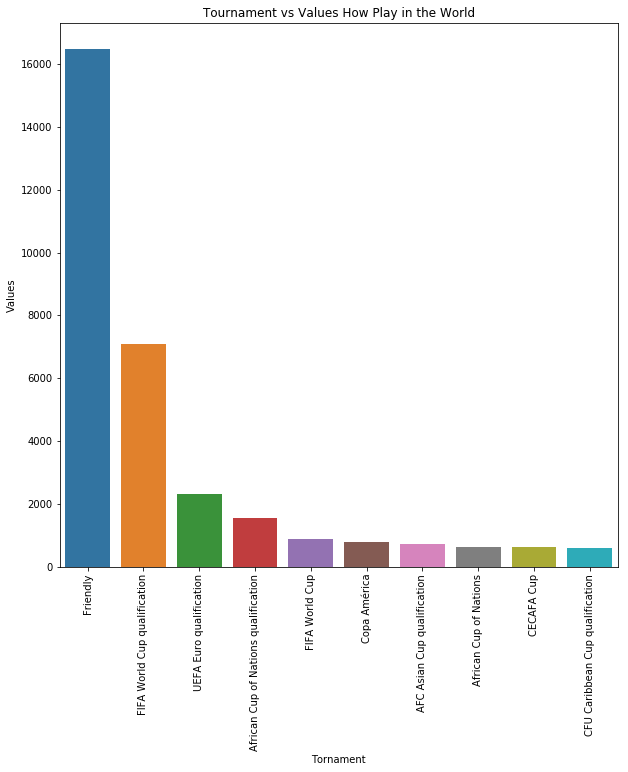

In [17]:
tournament=data['tournament'].value_counts()
names=tournament.index
values=tournament.values

plt.figure(figsize=(10,10))
sns.barplot(x=names[:10],y=values[:10])
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.xlabel('Tornament')
plt.title('Tournament vs Values How Play in the World')
plt.show()

In [19]:
rndNumbers=np.round(np.random.random(500)*39663)
data['id']=range(1,39663)

numbers=[]
for i in rndNumbers:
    numbers.append(int(i))
    
numbers.sort()
tournament=[]

for i in numbers:    
   tournament.append(data[data['id']==i].tournament.values)
 
tournaments=pd.DataFrame(tournament)

tournament_names_value=tournaments[0].value_counts()

i=tournament_names_value.index
v=tournament_names_value.values

trace1 = go.Scatter(x = v,y = i,mode = "lines",name = "citations",marker = dict(color = 'rgba(16, 112, 2, 0.8)'),text='')
data1=[trace1]
layout = dict(title = 'top 500 football results from 1872 to 2018 Count DataVisulation',xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False))
fig = dict(data = data1, layout = layout)
iplot(fig)

In [20]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,id
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,5


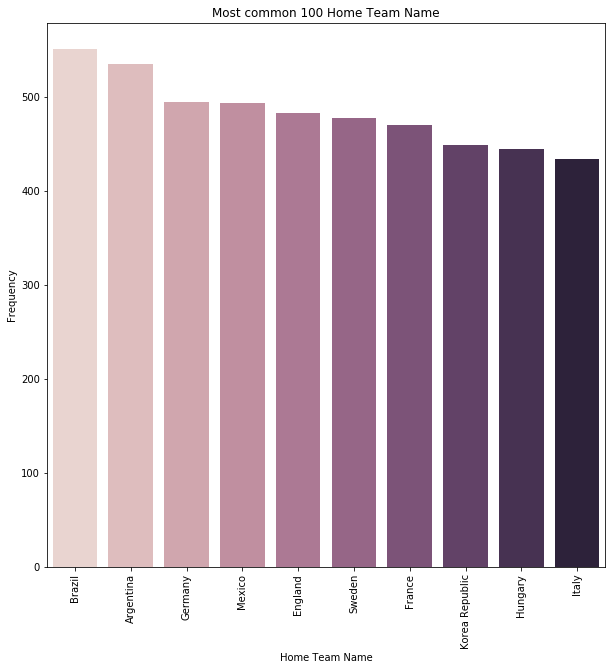

In [21]:
home_name_index=data.home_team.value_counts()
home_name_index=home_name_index.head(10)

plt.figure(figsize=(10,10))
ax=sns.barplot(x=home_name_index.index,y=home_name_index.values,palette=sns.cubehelix_palette(len(home_name_index.index)))
plt.xlabel('Home Team Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Most common 100 Home Team Name')
plt.show()

In [23]:
data.head()
data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,id
39657,2018-07-01,Croatia,Denmark,1,1,FIFA World Cup,Nizhny Novgorod,Russia,True,39658
39658,2018-07-02,Brazil,Mexico,2,0,FIFA World Cup,Samara,Russia,True,39659
39659,2018-07-02,Belgium,Japan,3,2,FIFA World Cup,Rostov-on-Don,Russia,True,39660
39660,2018-07-03,Sweden,Switzerland,1,0,FIFA World Cup,St. Petersburg,Russia,True,39661
39661,2018-07-03,Colombia,England,1,1,FIFA World Cup,Moscow,Russia,True,39662


In [24]:
tournament_liste=data.tournament.unique()
home_score_liste=[]
away_score_liste=[]
for tour in tournament_liste:
    home_score_liste.append(sum(data[data['tournament']==tour].home_score))
    away_score_liste.append(sum(data[data['tournament']==tour].away_score))

trace1=go.Bar(x=tournament_liste,y=home_score_liste,name='Home Score',marker = dict(color = 'rgba(255, 50, 70, 0.2)',line=dict(color='rgb(0,0,0)',width=1.5)),text='')
trace2=go.Bar(x=tournament_liste,y=away_score_liste,name='Away Score',marker = dict(color = 'rgba(0, 0, 0, 0.3)',line=dict(color='rgb(0,0,0)',width=1.5)),text ='') 
data2=[trace1,trace2]
layout=go.Layout(barmode='group')
fig=go.Figure(data=data2,layout=layout)
iplot(fig)

In [25]:
trace1={'x':tournament_liste,'y':home_score_liste,'name':'Home Score','type':'bar'};
trace2={'x':tournament_liste,'y':away_score_liste,'name':'Away Score','type':'bar'};
data3=[trace1,trace2]
layout = {
  'xaxis': {'title': 'Tournaments'},
  'barmode': 'relative',
  'title': 'Home Score and Away Score'
};
fig = go.Figure(data = data3, layout = layout)
iplot(fig)

In [27]:
data.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,id
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,5
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,6
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,7
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,8
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,9
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,10


In [28]:
veri=data[data['tournament']=='FIFA World Cup'].tail(56)
veri

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,id
39606,2018-06-14,Russia,Saudi Arabia,5,0,FIFA World Cup,Moscow,Russia,False,39607
39607,2018-06-15,Egypt,Uruguay,0,1,FIFA World Cup,Ekaterinburg,Russia,True,39608
39608,2018-06-15,Morocco,Iran,0,1,FIFA World Cup,St. Petersburg,Russia,True,39609
39609,2018-06-15,Portugal,Spain,3,3,FIFA World Cup,Sochi,Russia,True,39610
39610,2018-06-16,France,Australia,2,1,FIFA World Cup,Kazan,Russia,True,39611
39611,2018-06-16,Argentina,Iceland,1,1,FIFA World Cup,Moscow,Russia,True,39612
39612,2018-06-16,Peru,Denmark,0,1,FIFA World Cup,Saransk,Russia,True,39613
39613,2018-06-16,Croatia,Nigeria,2,0,FIFA World Cup,Kaliningrad,Russia,True,39614
39614,2018-06-17,Costa Rica,Serbia,0,1,FIFA World Cup,Samara,Russia,True,39615
39615,2018-06-17,Germany,Mexico,0,1,FIFA World Cup,Moscow,Russia,True,39616


In [29]:
veri=data[data['tournament']=='FIFA World Cup'].tail(56)

len(veri['home_team'].unique())
allteam=veri['home_team'].unique()
allteam

array(['Russia', 'Egypt', 'Morocco', 'Portugal', 'France', 'Argentina',
       'Peru', 'Croatia', 'Costa Rica', 'Germany', 'Brazil', 'Sweden',
       'Belgium', 'Tunisia', 'Colombia', 'Poland', 'Uruguay', 'Iran',
       'Denmark', 'Nigeria', 'Serbia', 'Korea Republic', 'England',
       'Japan', 'Saudi Arabia', 'Spain', 'Australia', 'Iceland', 'Mexico',
       'Switzerland', 'Senegal', 'Panama'], dtype=object)

In [30]:
away_scores_allteam=[]
home_scores_allteam=[]
for team in allteam:
    toplam=sum(veri[veri['home_team']==team].away_score)
    away_scores_allteam.append(toplam)
    home_scores_allteam.append(sum(veri[veri['home_team']==team].home_score))
    toplam=0

away_scores_allteam
home_scores_allteam
allteam

all_team=pd.DataFrame([allteam,home_scores_allteam,away_scores_allteam])
                       
all_team

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Russia,Egypt,Morocco,Portugal,France,Argentina,Peru,Croatia,Costa Rica,Germany,...,England,Japan,Saudi Arabia,Spain,Australia,Iceland,Mexico,Switzerland,Senegal,Panama
1,9,0,0,4,7,1,0,3,0,2,...,6,2,2,2,0,1,0,2,0,1
2,5,1,1,3,4,4,1,1,1,2,...,2,3,1,2,2,2,3,2,1,2


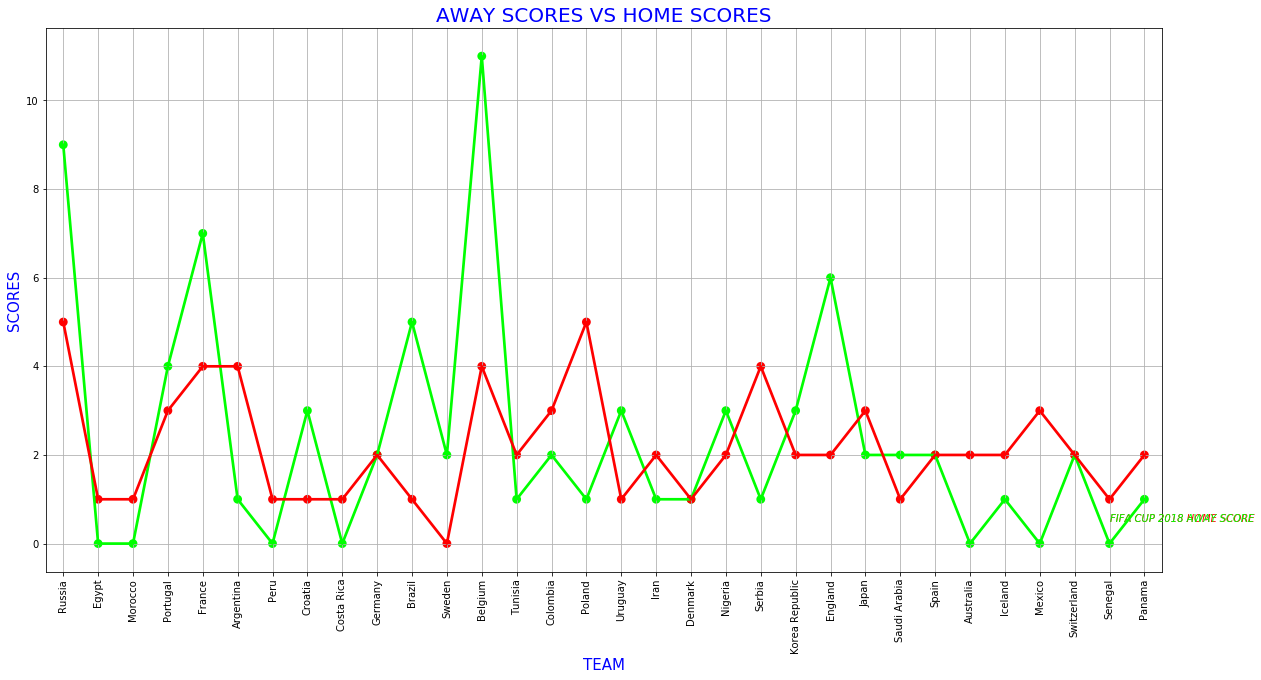

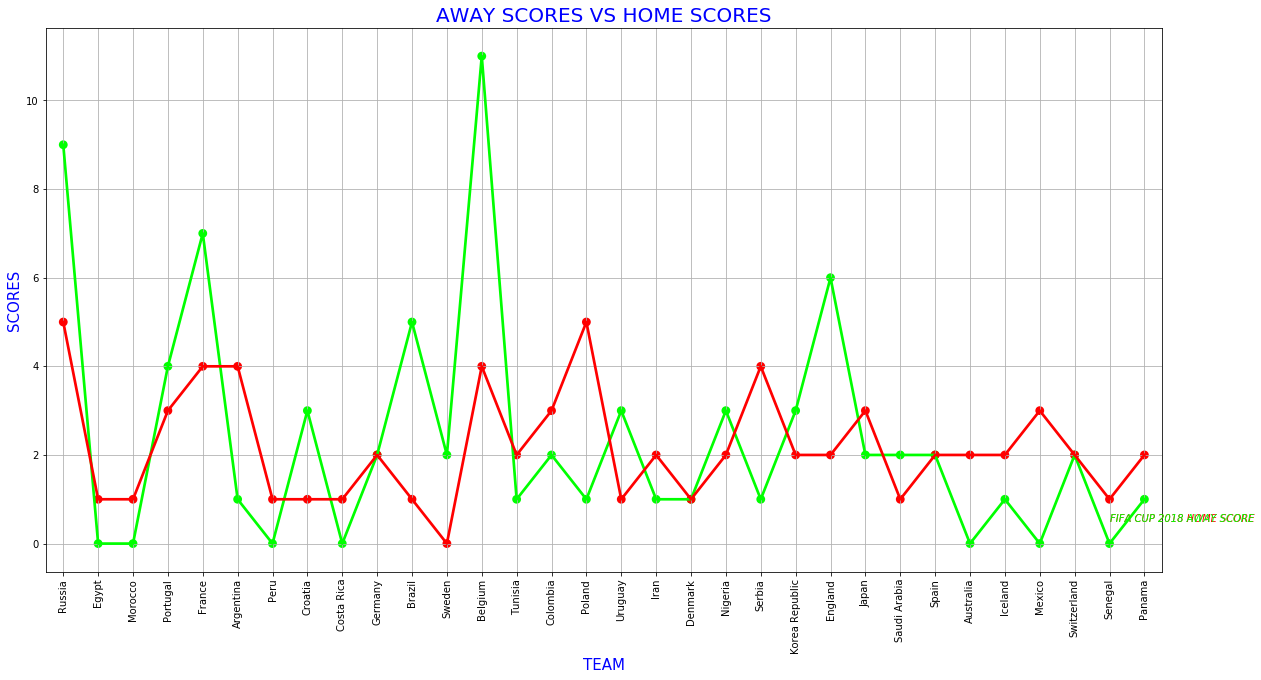

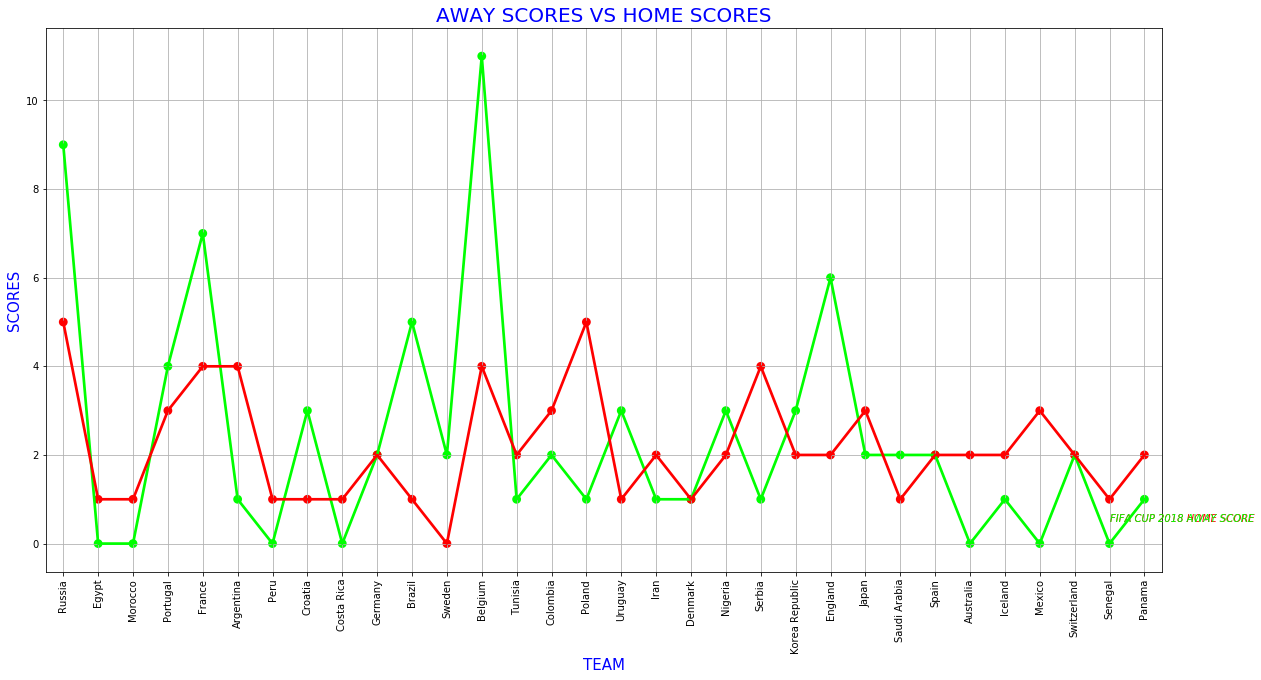

In [33]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=allteam,y=home_scores_allteam,data=veri,color='lime',alpha=0.8)
sns.pointplot(x=allteam,y=away_scores_allteam,data=veri,color='red',alpha=0.8)
plt.text(30,0.5,'FIFA CUP 2018 HOME SCORE',color='red',fontsize = 10,style = 'italic')
plt.text(30,0.5,'FIFA CUP 2018 AWAY SCORE',color='lime',fontsize = 10,style = 'italic')
plt.xlabel('TEAM',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('SCORES',fontsize = 15,color='blue')
plt.title('AWAY SCORES VS HOME SCORES',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [34]:
trace1=go.Scatter3d(x=allteam,y=home_scores_allteam,z=away_scores_allteam,mode='markers',marker=dict(size=10,color=allteam,colorscale='palegreen'))
data4=[trace1]
layout=go.Layout(margin=dict(l=0,r=0,b=0,t=0))
fig=go.Figure(data=data4,layout=layout)
iplot(fig)
plt.show()

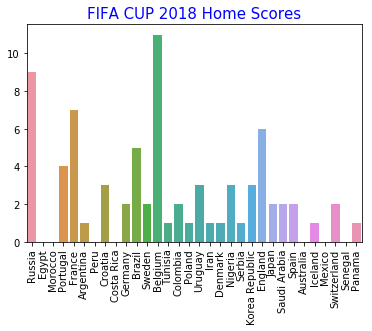

In [35]:
sns.barplot(x=allteam,y=home_scores_allteam)
plt.title('FIFA CUP 2018 Home Scores',color='b',fontsize=15)
plt.xticks(rotation=90)
plt.show()

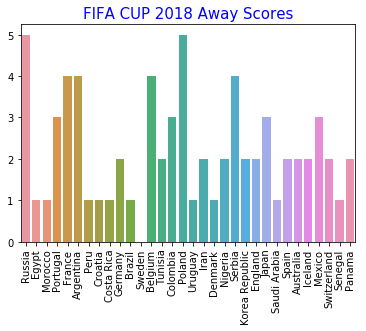

In [36]:
sns.barplot(x=allteam,y=away_scores_allteam)
plt.title('FIFA CUP 2018 Away Scores',color='b',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [38]:
data.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,id
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,5
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,6
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,7
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,8
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,9
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,10


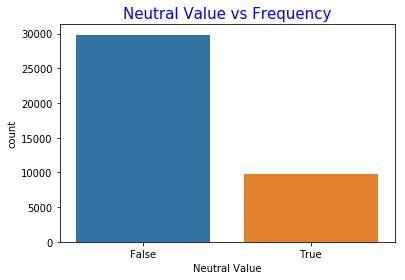

In [39]:
data['neutral'].unique()
data['neutral'].value_counts()
sns.countplot(data['neutral'])
plt.xlabel('Neutral Value')
plt.title('Neutral Value vs Frequency',color = 'blue',fontsize = 15)
plt.show()

In [40]:
data.tail(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,id
39642,2018-06-26,Australia,Peru,0,2,FIFA World Cup,Sochi,Russia,True,39643
39643,2018-06-26,Denmark,France,0,0,FIFA World Cup,Moscow,Russia,True,39644
39644,2018-06-26,Nigeria,Argentina,1,2,FIFA World Cup,St. Petersburg,Russia,True,39645
39645,2018-06-26,Iceland,Croatia,1,2,FIFA World Cup,Rostov-on-Don,Russia,True,39646
39646,2018-06-27,Korea Republic,Germany,2,0,FIFA World Cup,Kazan,Russia,True,39647
39647,2018-06-27,Mexico,Sweden,0,3,FIFA World Cup,Ekaterinburg,Russia,True,39648
39648,2018-06-27,Serbia,Brazil,0,2,FIFA World Cup,Moscow,Russia,True,39649
39649,2018-06-27,Switzerland,Costa Rica,2,2,FIFA World Cup,Nizhny Novgorod,Russia,True,39650
39650,2018-06-28,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,39651
39651,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,39652


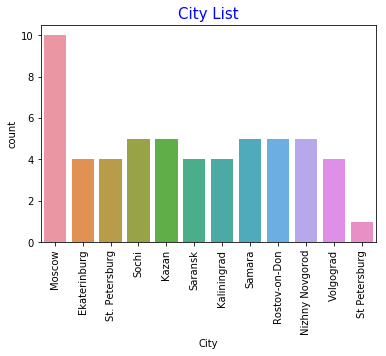

In [41]:
sns.countplot(veri.city)
plt.xlabel('City')
plt.xticks(rotation=90)
plt.title('City List',color='blue',fontsize=15)
plt.show()

In [44]:
tournaments=data.tournament.value_counts()
alltournaments=tournaments[:20]

fig = {
  "data": [
    {
      "values": alltournaments.values,
      "labels": alltournaments.index,
      "domain": {"x": [0, .5]},
      "name": "Tournaments Count",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Tournaments Rate",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Tour Counts",
                "x": 0.1,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

In [45]:
data.head()
import plotly.figure_factory as ff
dataframe = data[data.tournament == 'FIFA World Cup']
data2015 = dataframe.loc[:,["tournament","home_score", "away_score","id"]]
data2015
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='id',colormap='Portland',colormap_type='cat',height=700, width=700)
iplot(fig)